# Import libraries

In [19]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Generate a Sine Oscillator

In [20]:
fs = 8000       # sampling rate (F)
dur = 1         # duration, 1 second
f0 = 440        # frequency to generate, you can change the frequency 


x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs + np.pi/3)

ipd.Audio(x, rate=fs)



# Plot the Sine Oscillator

Text(0.5, 0, 'sec')

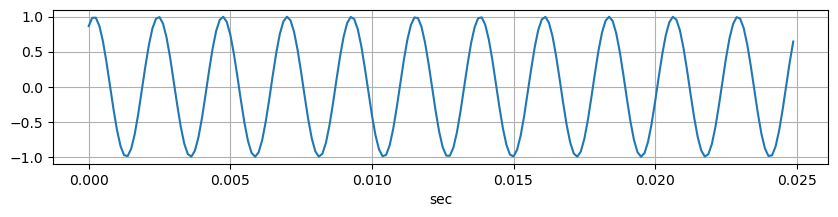

In [21]:
plt.figure(figsize=(10, 2))

n= np.arange(200)

plt.plot(n/fs, x[:200])
plt.grid(True)
plt.xlabel('sec')


# Plot the in-phase and quadrature compoponents



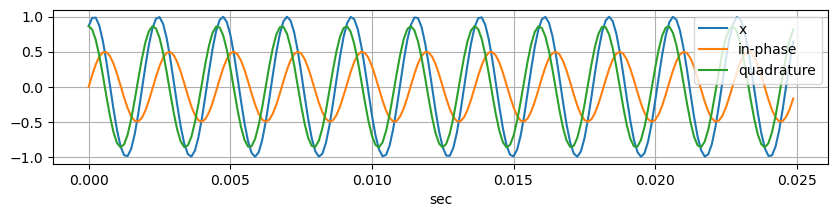

In [4]:
x_in = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)
x_quad = np.cos(2*np.pi*f0*np.arange(dur*fs)/fs)

A1= np.sin(np.pi/6)
A2= np.cos(np.pi/6)


plt.figure(figsize=(10, 2))

n= np.arange(200)

plt.plot(n/fs, x[:200])
plt.plot(n/fs, A1*x_in[:200])
plt.plot(n/fs, A2*x_quad[:200])
plt.grid(True)
plt.xlabel('sec')

plt.legend(['x','in-phase','quadrature'])


# Fourier Series and Additive Synthesis

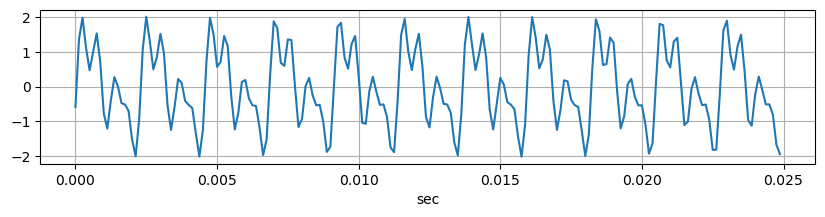

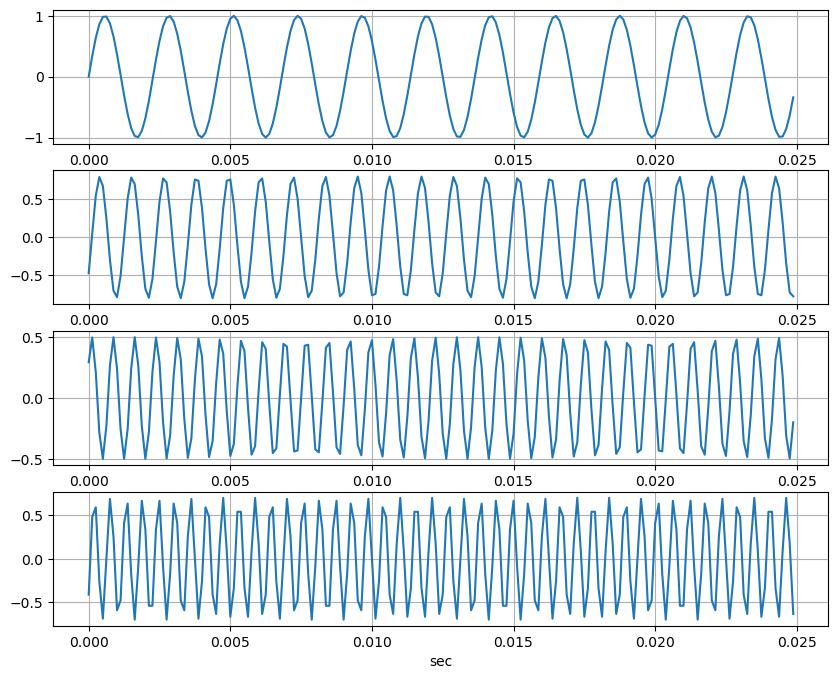

In [5]:
fs = 8000       # sampling rate
dur = 1         # duration, 1 second
f0 = 440        # fundamental frequency to play 


# You can adjust the amplitude and phase of harmonic partials
# Also, you can add more harmonic partials
x1 = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs + 0)
x2 = 0.8*np.sin(2*np.pi*f0*2*np.arange(dur*fs)/fs + np.pi*2*0.9)
x3 = 0.5*np.sin(2*np.pi*f0*3*np.arange(dur*fs)/fs + np.pi*2*0.1)
x4 = 0.7*np.sin(2*np.pi*f0*4*np.arange(dur*fs)/fs + np.pi*2*0.9)


#x = x4
x = x1+x2+x3+x4


plt.figure(figsize=(10, 2))

n= np.arange(200)
plt.plot(n/fs, x[:200])
plt.grid(True)
plt.xlabel('sec')


plt.figure(figsize=(10, 8))
plt.subplot(4,1,1)
plt.plot(n/fs, x1[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,2)
plt.plot(n/fs, x2[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,3)
plt.plot(n/fs, x3[:200])
plt.grid(True)
plt.xlabel('sec')
plt.subplot(4,1,4)
plt.plot(n/fs, x4[:200])
plt.grid(True)
plt.xlabel('sec')



ipd.Audio(x, rate=fs)



# Sawtooth and Sqaure Oscillators

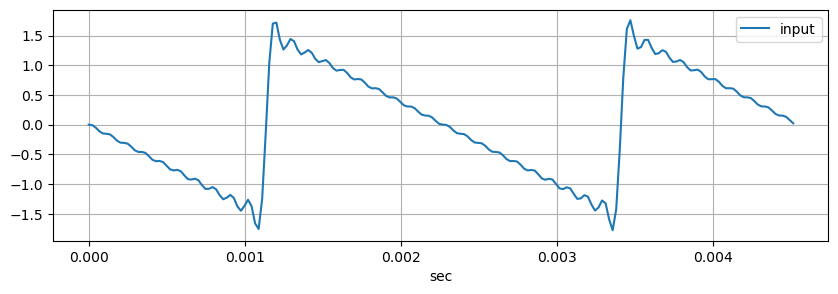

In [6]:

def sawtooth_additive(f0, dur, N, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency
# N:   number of harmonics to generate

    # fundamental mode
    x = -np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

    # adding harmonic modes
    for n in range(N-1):
        x = x + np.power(-1,n+2)/(n+2)*np.sin(2*np.pi*(n+2)*f0*np.arange(dur*fs)/fs)

    return x


def sqaure_additive(f0, dur, N, fs): 
# fs:  sampling rate
# dur: duration
# f0:  fundamental frequency
# N:   number of harmonics to generate

    # fundamental mode
    x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs)

    # adding harmonic modes
    for n in range(N-1):
        if np.mod(n+2,2):
            x = x + 1/(n+2)*np.sin(2*np.pi*(n+2)*f0*np.arange(dur*fs)/fs)

    return x



fs = 44100
x = sawtooth_additive(440, 1, 20, fs)
#x = sqaure_additive(200, 1, 20, fs)
        
plt.figure(figsize=(10, 3))

n= np.arange(200)

plt.plot(n/fs, x[:200],)
plt.grid(True)
plt.xlabel('sec')
plt.legend(['input'])

ipd.Audio(x, rate=fs)


# DFT of Sinusoid

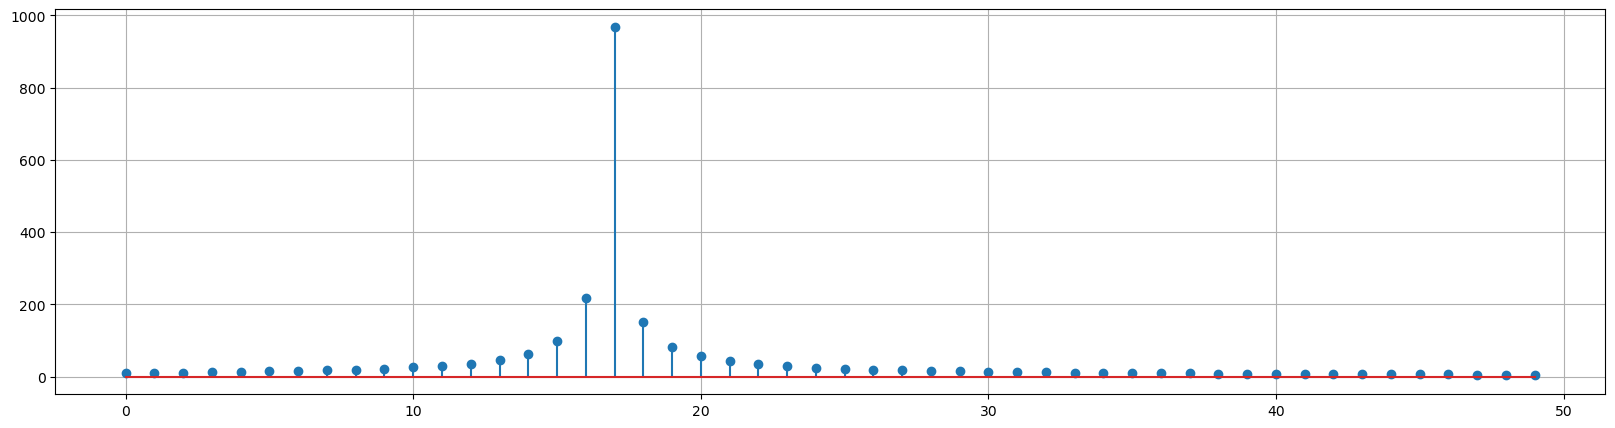

In [8]:

f0 = 261
fs = 8000
dur = 2

x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs);

win_size = 2048
FFT_size = 2048

x_seg = x[:win_size]

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_phs = np.angle(X)

X_mag2 = X_mag[50:100]


# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(X_mag2)
plt.grid(True)


# Zeropadding VS Large Window

Text(0.5, 1.0, 'Large Window')

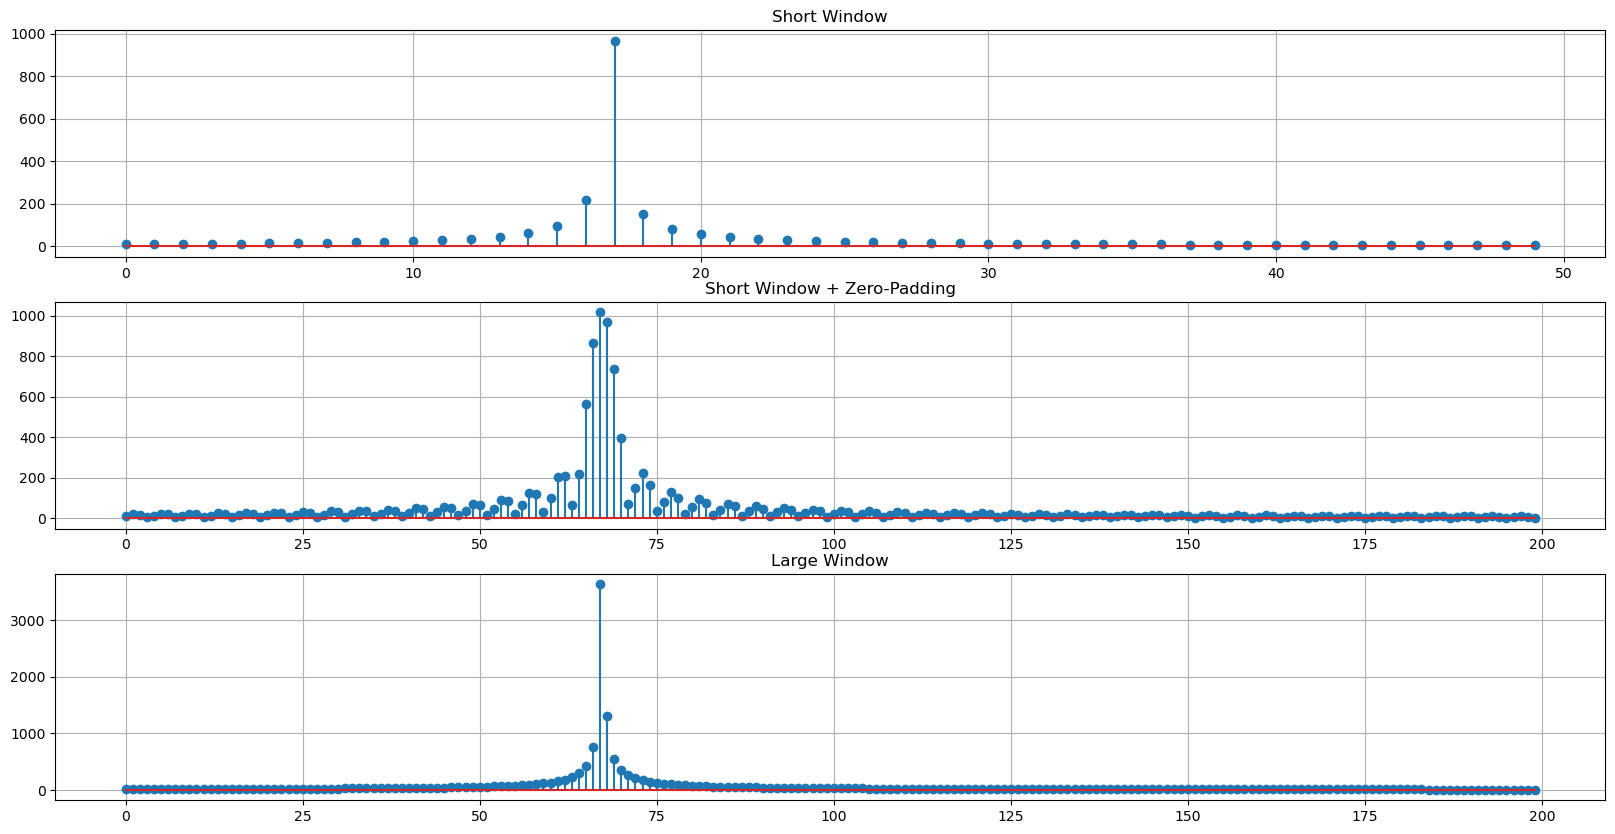

In [9]:
f0 = 261 
fs = 8000
dur = 2

x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs);

win_size = 2048
win_size_large = 2048*4
FFT_size = 2048*4

# zero padding
x_seg = x[:win_size]
x_seg_zp = np.append(x_seg, np.zeros(FFT_size-win_size))
X_zp= np.fft.fft(x_seg_zp)
X_mag_zp = np.abs(X_zp)
X_phs_zp = np.angle(X_zp)

# take half the FFT vector
N2 = int((FFT_size/2)+1)
X_mag_zp2 = X_mag_zp[50*4:100*4]


# large window
x_seg_lw = x[:win_size_large]
X_lw= np.fft.fft(x_seg_lw)
X_mag_lw = np.abs(X_lw)
X_phs_lw = np.angle(X_lw)

# take half the FFT vector
N2 = (FFT_size/2)+1
X_mag_lw2 = X_mag_lw[50*4:100*4]

plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
plt.stem(X_mag2)
plt.grid(True)
plt.title('Short Window')

# plot sinusoid with zeropadding
plt.subplot(3,1,2)
plt.stem(X_mag_zp2)
plt.grid(True)
plt.title('Short Window + Zero-Padding')

# plot sinusoid with a large window
plt.subplot(3,1,3)
plt.stem(X_mag_lw2)
plt.grid(True)
plt.title('Large Window')


# Load audio files

In [12]:
filename = "../audio/glockenspiel.wav"

# 22050Hz is the default sampling rate: resamples the input to 22050Hz
# Mono is the default number or channel: mix stereo to mono 

y, sr = librosa.load(filename) 
#y, sr = librosa.load(filename, sr=None) # use the native sampling rate
#y, sr = librosa.load(filename, sr=None, mono=False) # use the native sampling rate and native channels


print(y.shape)
print(sr)

ipd.Audio(y, rate=sr)


(52711,)
22050


# Display waveforms


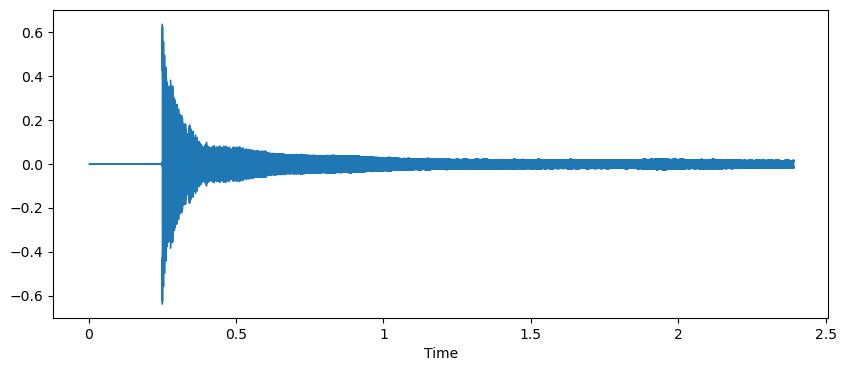

In [22]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)

# Display spectrum

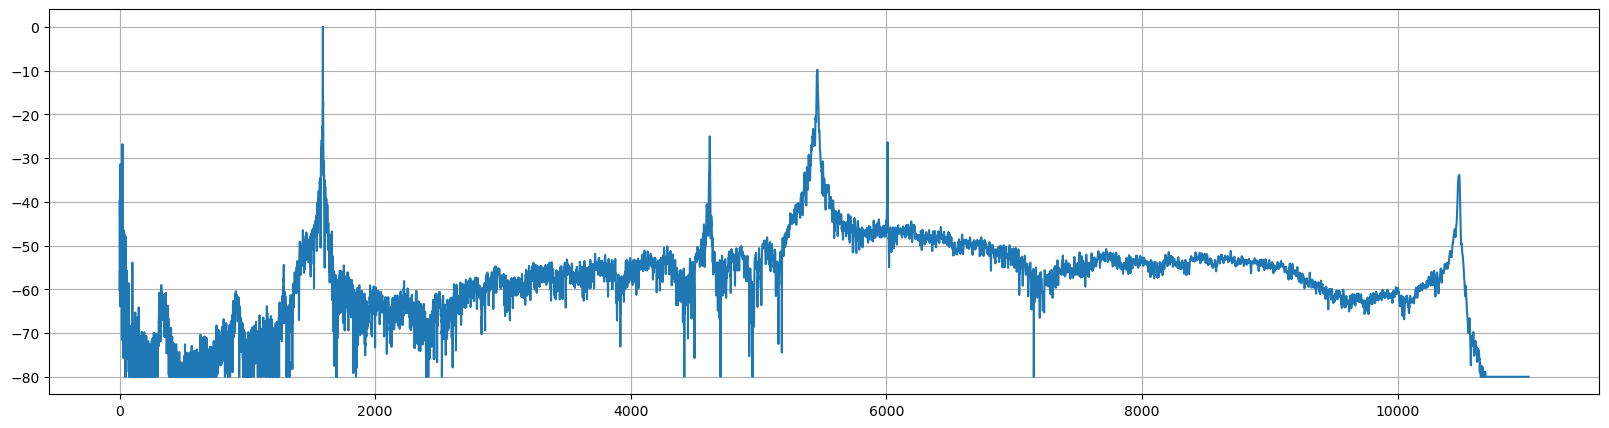

In [46]:
Y_fft = np.fft.fft(y)

Y_fft_mag = np.abs(Y_fft)
Y_fft_phs = np.angle(Y_fft)

N = len(Y_fft_mag)
M = int(np.round(N/2))

Y_fft_mag_dB = 20*np.log10(Y_fft_mag[:M])
Y_fft_mag_dBn = Y_fft_mag_dB - np.max(Y_fft_mag_dB) 
Y_fft_mag_dBn = np.maximum(Y_fft_mag_dBn, -80)

# plot linear scale
plt.figure(figsize=(20, 5))
plt.plot(np.arange(M)/N*sr,Y_fft_mag_dBn)
plt.grid(True)

# Compute spectrogram

In [14]:
hop_length = 512
n_fft = 2048
#Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)

# magnitude compression: linear to dB
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

# Display Spectrogram

Text(0.5, 1.0, 'Linear-frequency spectrogram')

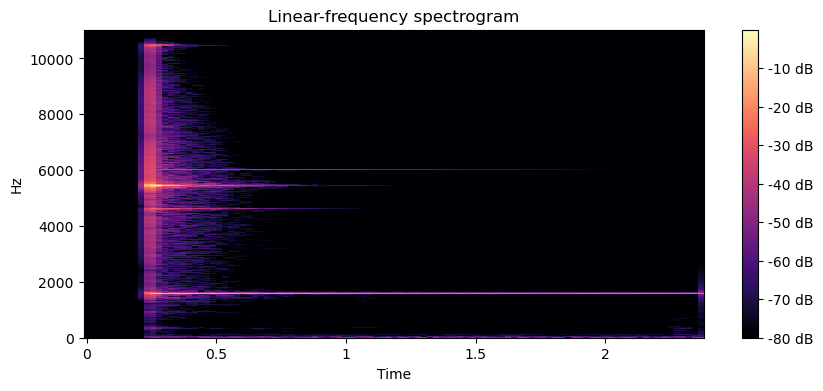

In [16]:
plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')

# Spectrogram with different window lengths

Text(0.5, 1.0, 'Linear-frequency spectrogram (short window)')

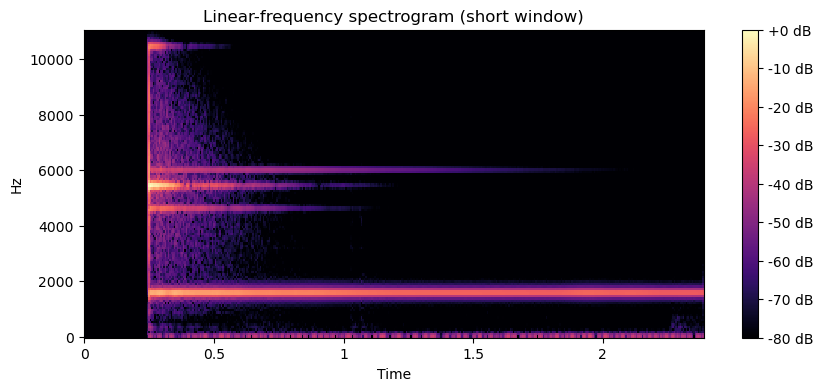

In [17]:
# short window
hop_length = 128
n_fft = 256

Y1 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(Y1), ref=np.max)

plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (short window)')

Text(0.5, 1.0, 'Linear-frequency spectrogram (long window)')

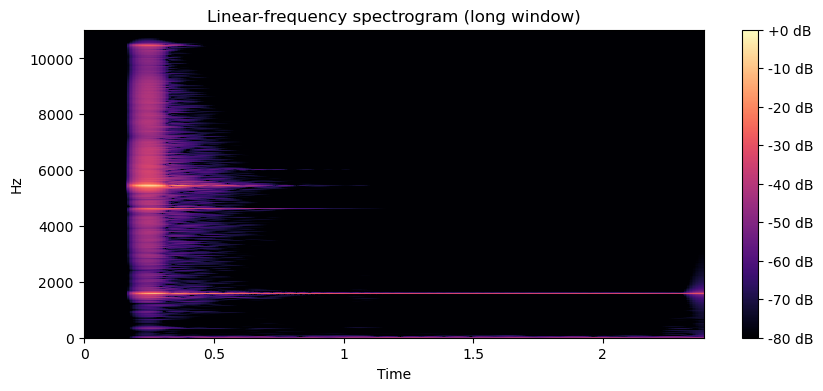

In [18]:
# long window
hop_length = 128
n_fft = 4096

Y2 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)


plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (long window)')